In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('flight.csv')

# **SOAL NO. 1**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [4]:
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


## **CHECK & HANDLING MISSING VALUES**

In [5]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Untuk kolom-kolom dengan tipe data kategorikal seperti `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, dan `GENDER` diputuskan akan membuang kolom tersebut karena tidak akan digunakan dalam algoritma clustering.

In [6]:
df = df.drop(['WORK_CITY','WORK_PROVINCE','WORK_COUNTRY','GENDER'],axis=1)

Untuk kolom `SUM_YR_1`, `SUM_YR_2`, `AGE` akan dicek terlebih dahulu bentuk distribusinya sebelum memutuskan mengganti nilai NULL dengan mean/median

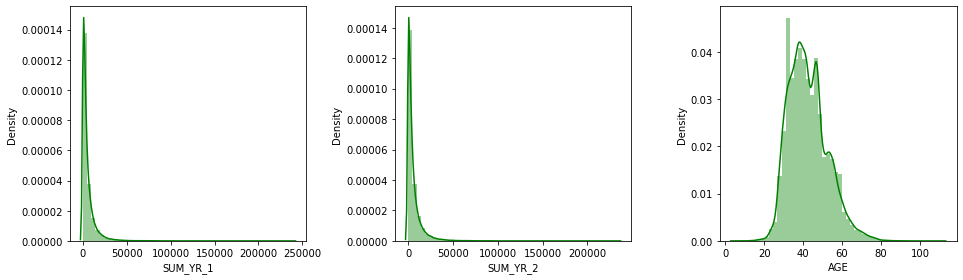

In [7]:
cek_null = ['SUM_YR_1','SUM_YR_2', 'AGE']
plt.figure(figsize=(18, 4))
for i in range(len(cek_null)):
    plt.subplot(1,4,i+1)
    sns.distplot(df[cek_null[i]],color='g')
    plt.tight_layout()

In [8]:
#Bentuk Distribusi untuk kolom SUM_YR_1 & SUM_YR_2 --> Right Skewness
#Bentuk Distribusi kolom AGE --> Multimodal
#Diputuskan untuk mengganti semua nilai NULL pada ketiga kolom tersebut dengan Median
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(df['SUM_YR_2'].median())

In [9]:
df.isna().any()

MEMBER_NO            False
FFP_DATE             False
FIRST_FLIGHT_DATE    False
FFP_TIER             False
AGE                  False
LOAD_TIME            False
FLIGHT_COUNT         False
BP_SUM               False
SUM_YR_1             False
SUM_YR_2             False
SEG_KM_SUM           False
LAST_FLIGHT_DATE     False
LAST_TO_END          False
AVG_INTERVAL         False
MAX_INTERVAL         False
EXCHANGE_COUNT       False
avg_discount         False
Points_Sum           False
Point_NotFlight      False
dtype: bool

## **CHECK DUPLICATE VALUES**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   FFP_TIER           62988 non-null  int64  
 4   AGE                62988 non-null  float64
 5   LOAD_TIME          62988 non-null  object 
 6   FLIGHT_COUNT       62988 non-null  int64  
 7   BP_SUM             62988 non-null  int64  
 8   SUM_YR_1           62988 non-null  float64
 9   SUM_YR_2           62988 non-null  float64
 10  SEG_KM_SUM         62988 non-null  int64  
 11  LAST_FLIGHT_DATE   62988 non-null  object 
 12  LAST_TO_END        62988 non-null  int64  
 13  AVG_INTERVAL       62988 non-null  float64
 14  MAX_INTERVAL       62988 non-null  int64  
 15  EXCHANGE_COUNT     62988 non-null  int64  
 16  avg_discount       629

In [11]:
df.duplicated().any()

False

In [12]:
cats = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
nums = ['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
        'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
        'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']

In [13]:
df[nums].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.466502,11.839414,10925.081254,5333.022406,5597.823538,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.853632,14.049471,16339.486151,8077.407958,8694.832417,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1020.000000,785.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6524.250000,6826.250000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [14]:
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62988,62988
unique,3068,3406,1,731
top,1/13/2011,2/16/2013,3/31/2014,3/31/2014
freq,184,96,62988,959


## **UNIVARIATE ANALYSIS**

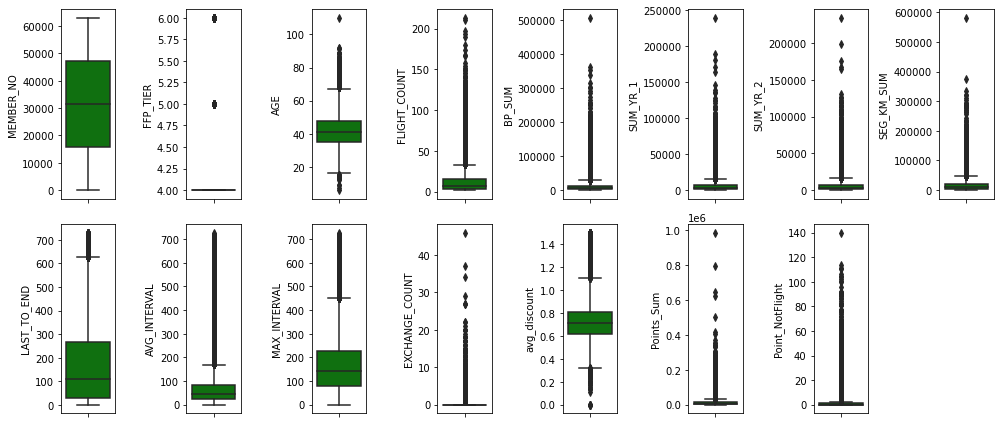

In [15]:
plt.figure(figsize = (14,6))
for i in range(len(nums)):
    plt.subplot(2,8,i+1)
    sns.boxplot(y=df[nums[i]],color='g',orient='v')
    plt.tight_layout()

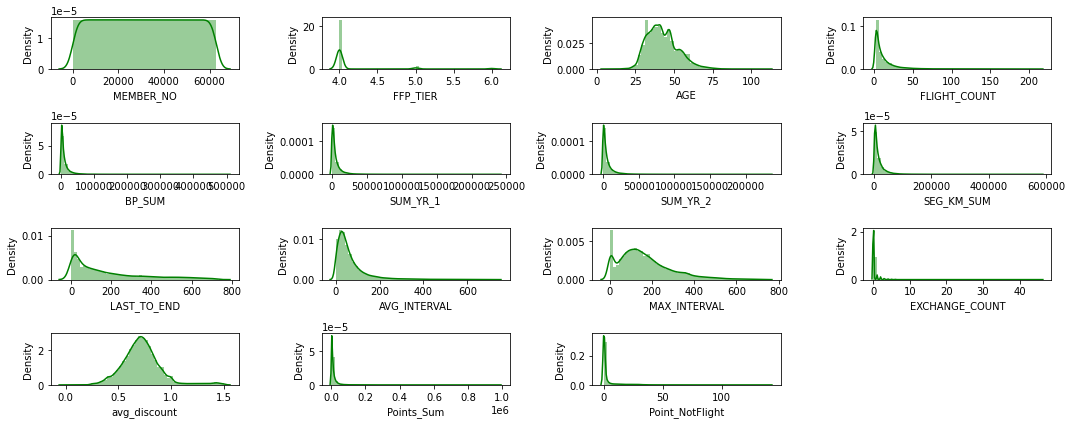

In [16]:
plt.figure(figsize = (15,6))
for i in range(len(nums)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[nums[i]],color='g')
    plt.tight_layout()

Dapat dilihat bahwa beberapa fitur perlu dilakukan handling terhadap outlier, namun handling outlier sebaiknya dilakukan pada saat telah menentukan fitur apa saja yang akan digunakan agar lebih efisien. Jadi untuk sementara step handling outlier akan diskip terlebih dahulu.

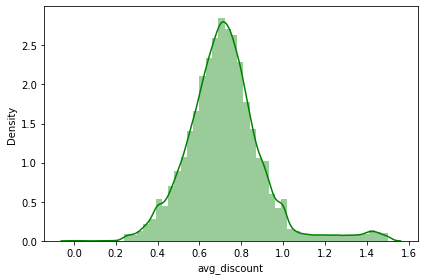

In [17]:
sns.distplot(df['avg_discount'],color='g')
plt.tight_layout()
plt.show()

Terlihat sedikit janggal karena ada yang mendapat avg_discount > 1. Dimana asumsi avg_discount 1 = 100%

In [18]:
#buang data yang diskon > 100%
df = df[df['avg_discount']<=1]

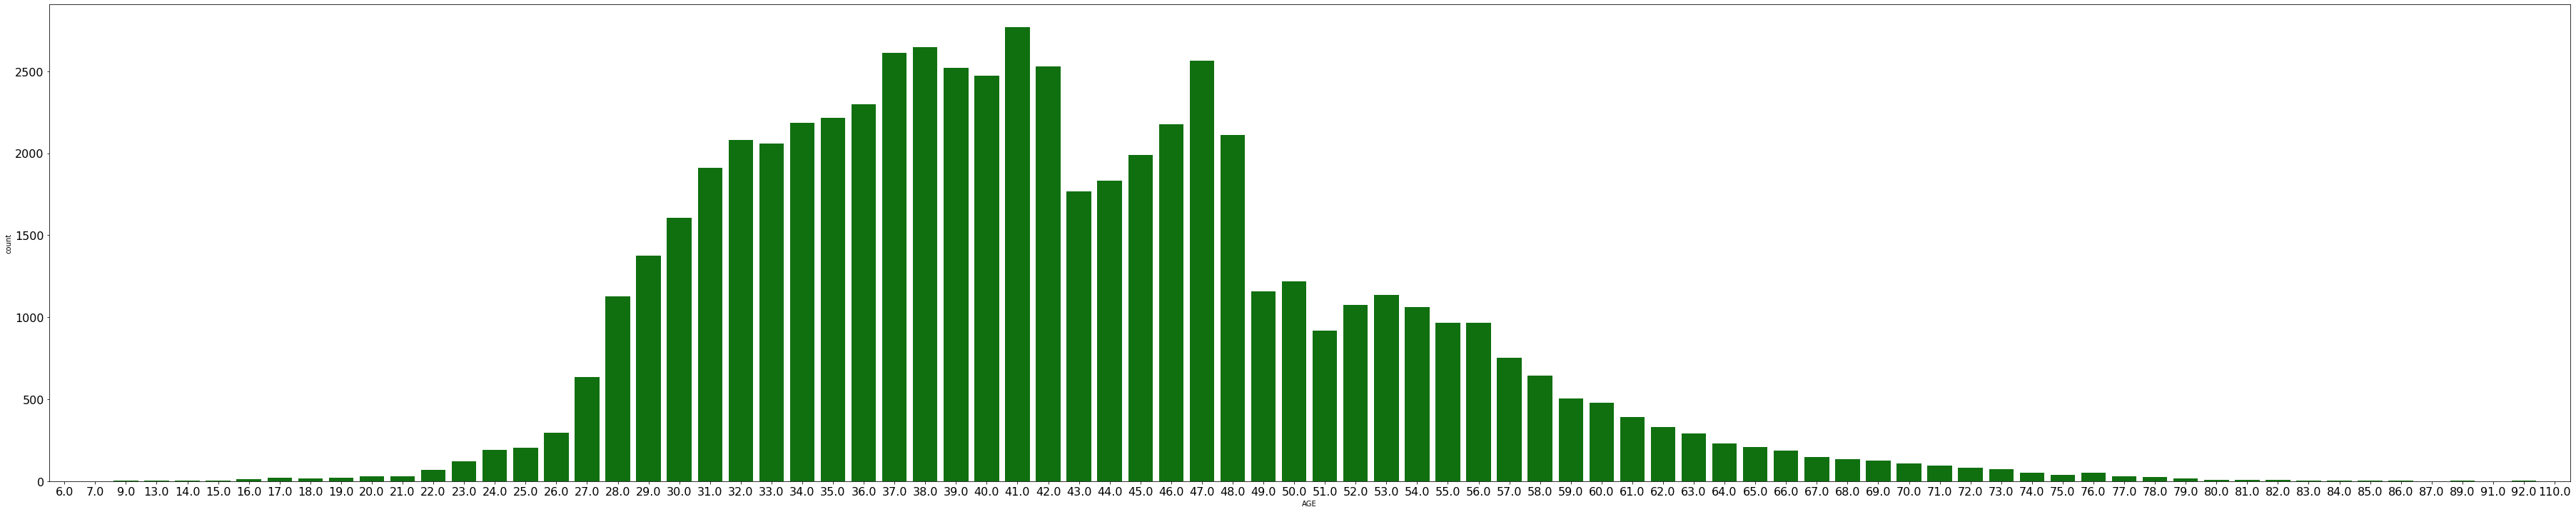

In [19]:
plt.figure(figsize = (50,10))
sns.countplot(x=df['AGE'],color='g')
plt.tight_layout()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Dapat dilihat bahwa distribusi umur terbesar pada rentang 27-56 tahun. Pada umur tersebut merupakan usia produktif sehingga banyak perjalanan yang dilakukan oleh kelompok usia tersebut.

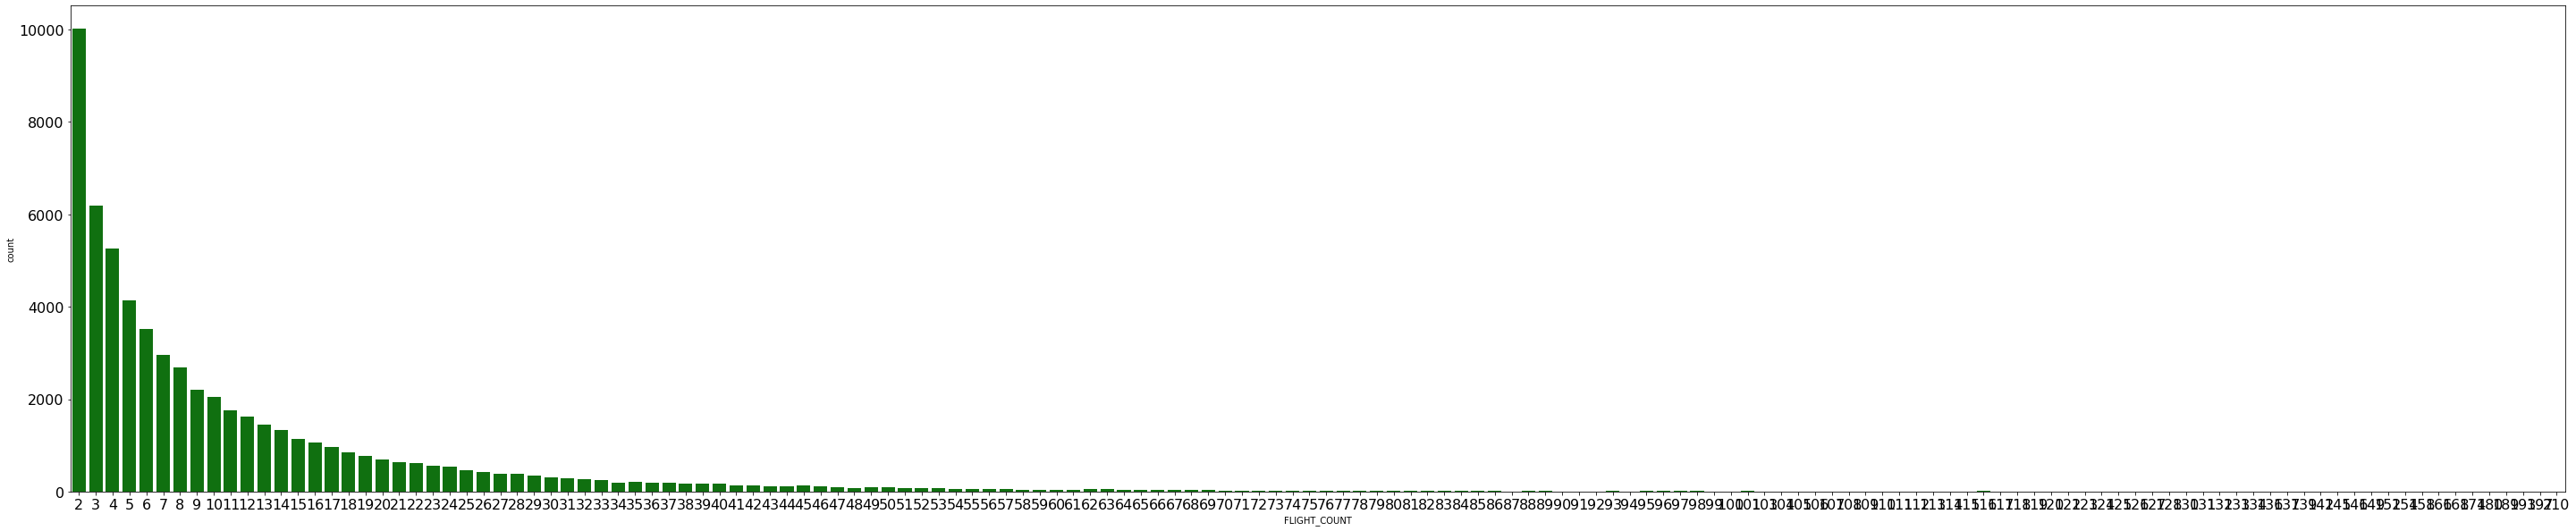

In [20]:
plt.figure(figsize=(50,10))
sns.countplot(x=df["FLIGHT_COUNT"], color='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Dapat dilihat bahwa setiap pelanggan setidaknya pernah melakukan penerbangan sebanyak 2x.

## **MULTIVARIATE ANALYSIS**

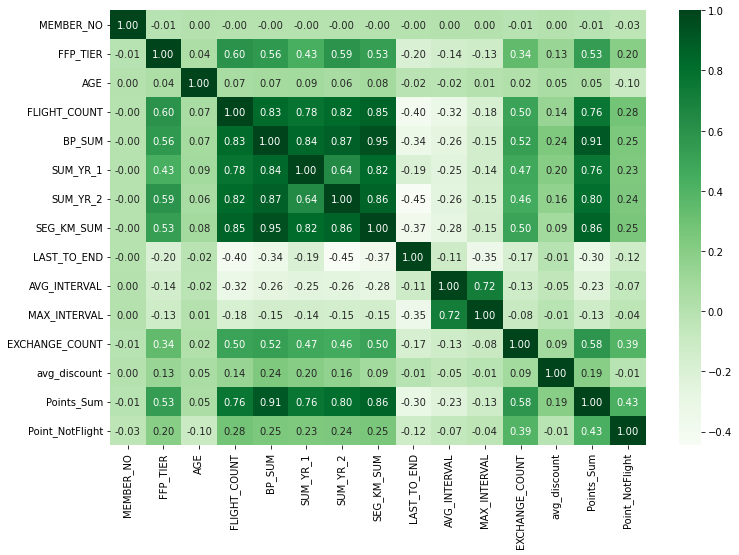

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

Setelah melihat dari matriks korelasi dan melihat definisi dari setiap feature diputuskan akan membuang feature berikut ini karena dirasa tidak akan berguna dalam membentuk model clustering : `age`, `MEMBER_NO`, `SUM_YR_1`, `SUM_YR_2`, `Point_NotFlight`, `AVG_INTERVAL`, `MAX_INTERVAL`, `EXCHANGE_COUNT`. Sepertinya `BP_SUM` & `Points_Sum` & `SEG_KM_SUM` merupakan feature yang redundan maka diputuskan hanya akan mengambil salah satunya. Sebenarnya `FLIGHT_COUNT` juga tergolong redundan terhadap `BP_SUM` tetapi feature tersebut merupakan feature yang penting sehingga tidak dibuang.

# SOAL NO. 2

Ketika ingin melakukan segmentasi kepada para pelanggan maskapai penerbangan feature2 yang penting digunakan adalah feature yang merepresentasikan aktivitas penerbangan dari pelanggan. Oleh sebab itu diputuskan bahwa feature yang penting dan akan digunakan adalah sebagai berikut ini :
* FLIGHT_COUNT
* SEG_KM_SUM
* LAST_FLIGHT_DATE
* LAST_TO_END
* FIRST_FLIGHT_DATE
* avg_discount
* LOAD_TIME
* FFP_DATE

In [22]:
df = df[['FLIGHT_COUNT','SEG_KM_SUM', 'FIRST_FLIGHT_DATE', 
         'LAST_FLIGHT_DATE', 'LAST_TO_END', 'avg_discount', 'LOAD_TIME', 'FFP_DATE']]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FLIGHT_COUNT       60041 non-null  int64  
 1   SEG_KM_SUM         60041 non-null  int64  
 2   FIRST_FLIGHT_DATE  60041 non-null  object 
 3   LAST_FLIGHT_DATE   60041 non-null  object 
 4   LAST_TO_END        60041 non-null  int64  
 5   avg_discount       60041 non-null  float64
 6   LOAD_TIME          60041 non-null  object 
 7   FFP_DATE           60041 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.1+ MB


In [24]:
df

,FLIGHT_COUNT,SEG_KM_SUM,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,LOAD_TIME,FFP_DATE
0,210,580717,12/24/2008,3/31/2014,1,0.961639,3/31/2014,11/2/2006
4,152,309928,4/15/2009,3/27/2014,5,0.970658,3/31/2014,4/10/2009
5,92,294585,9/29/2009,1/13/2014,79,0.967692,3/31/2014,2/10/2008
6,101,287042,3/29/2006,3/31/2014,1,0.965347,3/31/2014,3/22/2006
7,73,287230,4/9/2010,3/29/2014,3,0.962070,3/31/2014,4/9/2010
...,...,...,...,...,...,...,...,...
62983,2,1134,6/5/2013,6/9/2013,297,0.000000,3/31/2014,5/20/2011
62984,4,8016,9/14/2013,1/3/2014,89,0.000000,3/31/2014,3/8/2010
62985,2,2594,12/2/2006,3/3/2014,29,0.000000,3/31/2014,3/30/2006
62986,2,3934,2/14/2013,2/26/2013,400,0.000000,3/31/2014,2/6/2013


In [25]:
time_col = ['FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE', 'LOAD_TIME', 'FFP_DATE']
df[df['LAST_FLIGHT_DATE']=='2014/2/29  0:00:00']
#ada februari yang tanggal sampai 29, pada 2014 februari hanya sampai 28
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2014/2/28  0:00:00')

In [26]:
for i in time_col:
    df[i] = pd.to_datetime(df[i])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FLIGHT_COUNT       60041 non-null  int64         
 1   SEG_KM_SUM         60041 non-null  int64         
 2   FIRST_FLIGHT_DATE  60041 non-null  datetime64[ns]
 3   LAST_FLIGHT_DATE   60041 non-null  datetime64[ns]
 4   LAST_TO_END        60041 non-null  int64         
 5   avg_discount       60041 non-null  float64       
 6   LOAD_TIME          60041 non-null  datetime64[ns]
 7   FFP_DATE           60041 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(3)
memory usage: 4.1 MB


In [28]:
df.describe()

,FLIGHT_COUNT,SEG_KM_SUM,LAST_TO_END,avg_discount
count,60041.00000,60041.000000,60041.000000,60041.000000
mean,11.65422,16772.027931,177.260855,0.695875
std,13.75629,20335.635374,184.117824,0.144030
min,2.00000,368.000000,1.000000,0.000000
25%,3.00000,4713.000000,30.000000,0.605626
50%,7.00000,9878.000000,109.000000,0.703390
75%,14.00000,20893.000000,270.000000,0.794527
max,210.00000,580717.000000,731.000000,1.000000


In [29]:
df

,FLIGHT_COUNT,SEG_KM_SUM,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,LAST_TO_END,avg_discount,LOAD_TIME,FFP_DATE
0,210,580717,2008-12-24,2014-03-31,1,0.961639,2014-03-31,2006-11-02
4,152,309928,2009-04-15,2014-03-27,5,0.970658,2014-03-31,2009-04-10
5,92,294585,2009-09-29,2014-01-13,79,0.967692,2014-03-31,2008-02-10
6,101,287042,2006-03-29,2014-03-31,1,0.965347,2014-03-31,2006-03-22
7,73,287230,2010-04-09,2014-03-29,3,0.962070,2014-03-31,2010-04-09
...,...,...,...,...,...,...,...,...
62983,2,1134,2013-06-05,2013-06-09,297,0.000000,2014-03-31,2011-05-20
62984,4,8016,2013-09-14,2014-01-03,89,0.000000,2014-03-31,2010-03-08
62985,2,2594,2006-12-02,2014-03-03,29,0.000000,2014-03-31,2006-03-30
62986,2,3934,2013-02-14,2013-02-26,400,0.000000,2014-03-31,2013-02-06


In [30]:
# rata-rata penerbangan dalam 1 tahun
df['FLIGHT_PER_YEAR'] =  df['FLIGHT_COUNT'] / ((df['LAST_FLIGHT_DATE'] - df['FIRST_FLIGHT_DATE']) / np.timedelta64(1, 'Y'))

In [31]:
# Sudah berapa lama join program frequent flyer
df['JOIN_MONTH'] = (df['LOAD_TIME'] - df['FFP_DATE']) / np.timedelta64(1,'M')

In [32]:
df.drop(['LAST_FLIGHT_DATE', 'FIRST_FLIGHT_DATE', 'FLIGHT_COUNT', 'LOAD_TIME', 'FFP_DATE'],axis=1,inplace=True)

In [33]:
df

,SEG_KM_SUM,LAST_TO_END,avg_discount,FLIGHT_PER_YEAR,JOIN_MONTH
0,580717,1,0.961639,39.886076,88.905316
4,309928,5,0.970658,30.723221,59.664469
5,294585,79,0.967692,21.443720,73.627795
6,287042,1,0.965347,12.616106,96.297665
7,287230,3,0.962070,18.388071,47.705292
...,...,...,...,...,...
62983,1134,297,0.000000,182.621250,34.366209
62984,8016,89,0.000000,13.161892,48.756648
62985,2594,29,0.000000,0.275863,96.034826
62986,3934,400,0.000000,60.873750,13.733342


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEG_KM_SUM       60041 non-null  int64  
 1   LAST_TO_END      60041 non-null  int64  
 2   avg_discount     60041 non-null  float64
 3   FLIGHT_PER_YEAR  60041 non-null  float64
 4   JOIN_MONTH       60041 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 2.7 MB


Feature yang akan dipakai untuk K-Means Clustering adalah :
* SEG_KM_SUM
* LAST_TO_END
* avg_discount
* FLIGHT_PER_YEAR
* JOIN_MONTH

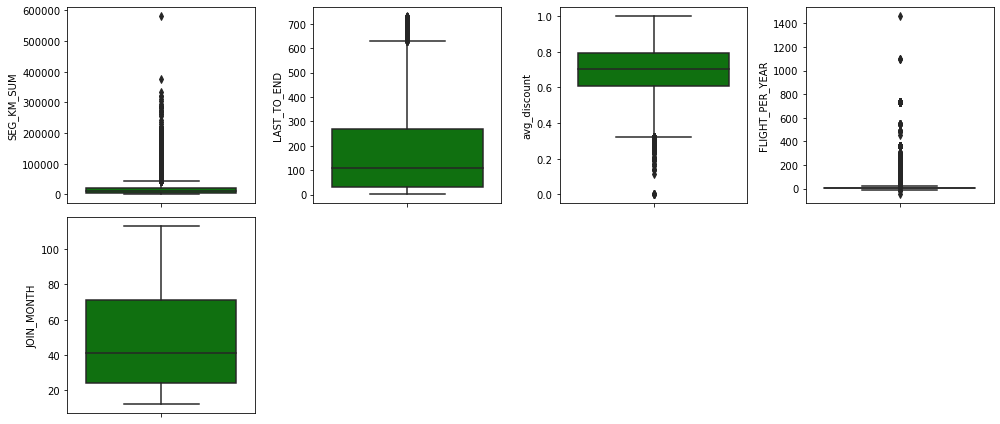

In [35]:
# Handling Outlier (dikarenakan saat awal belum dilakukan)
plt.figure(figsize = (14,6))
feats = ['SEG_KM_SUM', 'LAST_TO_END', 'avg_discount', 'FLIGHT_PER_YEAR', 'JOIN_MONTH']
for i in range(len(feats)):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=df[feats[i]],color='g',orient='v')
    plt.tight_layout()

In [36]:
#SEG_KM_SUM (1)
Q1_1 = df['SEG_KM_SUM'].quantile(0.25)
Q3_1 = df['SEG_KM_SUM'].quantile(0.75)
IQR = Q3_1 - Q1_1
batas_bawah_1 = Q1_1 - (IQR * 1.5)
batas_atas_1 = Q3_1 + (IQR * 1.5)

#LAST_TO_END (2)
Q1_2= df['LAST_TO_END'].quantile(0.25)
Q3_2= df['LAST_TO_END'].quantile(0.75)
IQR = Q3_2 - Q1_2
batas_bawah_2 = Q1_2 - (IQR * 1.5)
batas_atas_2 = Q3_2 + (IQR * 1.5)

#avg_discount (3) 
Q1_3 = df['avg_discount'].quantile(0.25)
Q3_3 = df['avg_discount'].quantile(0.75)
IQR = Q3_3 - Q1_3
batas_bawah_3 = Q1_3 - (IQR * 1.5)
batas_atas_3 = Q3_3 + (IQR * 1.5)

#AVG_PER_YEAR (4)
Q1_4 = df['FLIGHT_PER_YEAR'].quantile(0.25)
Q3_4 = df['FLIGHT_PER_YEAR'].quantile(0.75)
IQR = Q3_4 - Q1_4
batas_bawah_4 = Q1_4 - (IQR * 1.5)
batas_atas_4 = Q3_4 + (IQR * 1.5)


df_cluster = df[((df['SEG_KM_SUM'] >= batas_bawah_1) & (df['SEG_KM_SUM'] <= batas_atas_1)) &
                 ((df['LAST_TO_END'] >= batas_bawah_2) & (df['LAST_TO_END'] <= batas_atas_2)) &
                 ((df['avg_discount'] >= batas_bawah_3) & (df['avg_discount'] <= batas_atas_3)) &
                 ((df['FLIGHT_PER_YEAR'] >= batas_bawah_4) & (df['FLIGHT_PER_YEAR'] <= batas_atas_4))]

In [37]:
df_cluster = df_cluster.reset_index(drop=True)

In [38]:
df_cluster

,SEG_KM_SUM,LAST_TO_END,avg_discount,FLIGHT_PER_YEAR,JOIN_MONTH
0,42885,92,0.998753,14.030381,31.967802
1,44965,38,0.947906,6.265920,62.095731
2,43488,122,0.979314,3.312080,111.049508
3,43823,353,0.964519,2.024305,67.713916
4,44132,23,0.955218,9.838182,49.512310
...,...,...,...,...,...
48877,368,471,0.750000,0.664077,51.582168
48878,368,492,0.750000,1.466837,32.460625
48879,368,252,0.750000,0.232639,111.443767
48880,368,418,0.750000,0.478693,63.804185


In [39]:
#Standardization for all features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_cluster_std = sc.fit_transform(df_cluster)

In [40]:
df_cluster_std

array([[ 2.94682306, -0.43341155,  2.18610534,  2.36472813, -0.64082997],
       [ 3.15183584, -0.77659283,  1.81649865,  0.44135765,  0.46366097],
       [ 3.00625705, -0.24275528,  2.04480275, -0.29035166,  2.2583082 ],
       ...,
       [-1.24381562,  0.58342188,  0.37794266, -1.05317437,  2.27276173],
       [-1.24381562,  1.63838657,  0.37794266, -0.99222317,  0.52629296],
       [-1.24381562, -0.45247717,  0.08718682, -1.05151275,  2.10052378]])

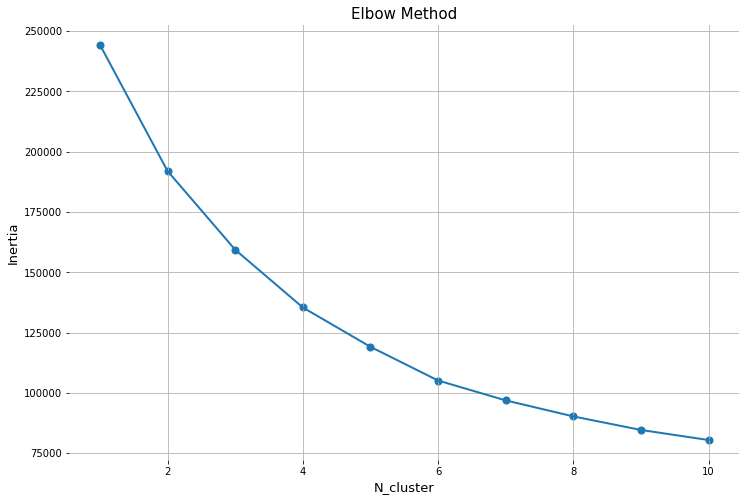

In [41]:
#Evaluation using Elbow Method
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_cluster_std)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.scatter(range(1,11),inertia,s=50)
ax = plt.gca()
plt.plot(range(1,11),inertia,linewidth=2)
plt.title('Elbow Method',fontsize=15)
plt.grid()
ax.spines[:].set_visible(False)
plt.ylabel('Inertia',fontsize=13)
plt.xlabel('N_cluster',fontsize=13)
plt.show()

In [42]:
inertia_table = pd.DataFrame((pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100, columns=['Inertia Reduction (%)'])
inertia_table

,Inertia Reduction (%)
0,21.436055
1,16.995433
2,15.030147
3,12.051583
4,11.740894
5,7.838495
6,6.854494
7,6.227758
8,4.938600
9,NaN


Dapat dilihat bahwa merubah k = 3 ke k = 4 masih memberikan inertia reduction 15% sedangkan ketika merubah k = 4 menjadi k = 5 inertia reduction berkurang menjadi 12%. Oleh sebab itu digunakan **k = 4**

In [43]:
kmeans = KMeans(n_clusters=4,random_state=42).fit(df_cluster_std)
kmeans.fit(df_cluster_std)

KMeans(n_clusters=4, random_state=42)

In [44]:
df_cluster_std = pd.DataFrame(data=df_cluster_std, columns=['SEG_KM_SUM', 'LAST_TO_END',
                                                            'avg_discount', 'FLIGHT_PER_YEAR', 'JOIN_MONTH'])
df_cluster_std['k_label'] = kmeans.labels_
df_cluster_std

,SEG_KM_SUM,LAST_TO_END,avg_discount,FLIGHT_PER_YEAR,JOIN_MONTH,k_label
0,2.946823,-0.433412,2.186105,2.364728,-0.640830,1
1,3.151836,-0.776593,1.816499,0.441358,0.463661,1
2,3.006257,-0.242755,2.044803,-0.290352,2.258308,2
3,3.039276,1.225298,1.937261,-0.609352,0.669624,2
4,3.069732,-0.871921,1.869654,1.326259,0.002352,1
...,...,...,...,...,...,...
48877,-1.243816,1.975213,0.377943,-0.946301,0.078233,0
48878,-1.243816,2.108672,0.377943,-0.747445,-0.622763,0
48879,-1.243816,0.583422,0.377943,-1.053174,2.272762,2
48880,-1.243816,1.638387,0.377943,-0.992223,0.526293,0


In [45]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pca.fit(df_cluster_std)
df_pca = pca.transform(df_cluster_std)

In [46]:
df_pca = pd.DataFrame(data = df_pca, columns = ['PC 1', 'PC 2'])
df_pca['cluster'] = kmeans.labels_
df_pca.head()

,PC 1,PC 2,cluster
0,0.055138,3.595867,1
1,-0.292964,1.747790,1
2,-0.540565,0.016185,2
3,0.335833,0.406766,2
4,-0.320742,2.600534,1


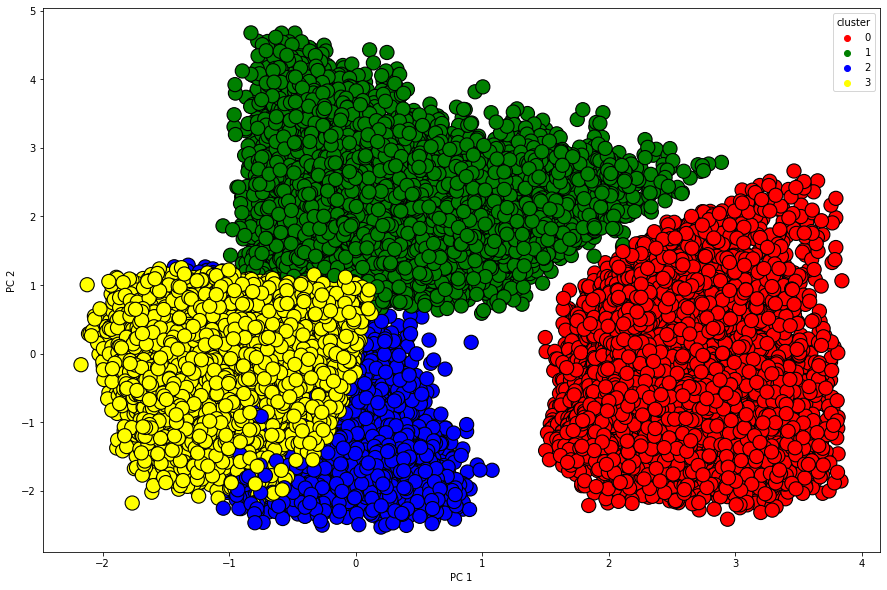

In [47]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df_pca["PC 1"], y=df_pca["PC 2"], hue=df_pca['cluster'],
                s=200, edgecolor='black', palette=['red','green','blue','yellow'])
plt.show()

In [48]:
df_cluster['k_label'] = kmeans.labels_
df_cluster

,SEG_KM_SUM,LAST_TO_END,avg_discount,FLIGHT_PER_YEAR,JOIN_MONTH,k_label
0,42885,92,0.998753,14.030381,31.967802,1
1,44965,38,0.947906,6.265920,62.095731,1
2,43488,122,0.979314,3.312080,111.049508,2
3,43823,353,0.964519,2.024305,67.713916,2
4,44132,23,0.955218,9.838182,49.512310,1
...,...,...,...,...,...,...
48877,368,471,0.750000,0.664077,51.582168,0
48878,368,492,0.750000,1.466837,32.460625,0
48879,368,252,0.750000,0.232639,111.443767,2
48880,368,418,0.750000,0.478693,63.804185,0


In [49]:
df_cluster_interpretation = df_cluster.groupby('k_label').agg({'SEG_KM_SUM' : 'mean',
                                                               'LAST_TO_END':'mean',
                                                               'avg_discount':'mean',
                                                               'FLIGHT_PER_YEAR': 'mean',
                                                               'JOIN_MONTH' : ['mean','count']})

In [50]:
df_cluster_interpretation

SEG_KM_SUM LAST_TO_END avg_discount FLIGHT_PER_YEAR JOIN_MONTH  \
                 mean        mean         mean            mean       mean   
k_label                                                                     
0         5893.962479  424.865803     0.732073        2.899471  52.099532   
1        22115.375624  103.976374     0.710630       10.600567  29.370775   
2        16713.563620   86.593455     0.710196        2.274904  80.757342   
3         8204.876703  113.025091     0.661233        3.659461  32.523818   

                
         count  
k_label         
0         8875  
1         9608  
2        14178  
3        16221

Interpretasi Cluster

Cluster 0 <br>
Tipe pelanggan ini adalah pelanggan yang telah melakukan total jarak penerbangan dengan rata-rata 5900 km (paling rendah dibandingkan kelompok pelanggan pada cluster lain), dan sudah cukup lama tidak melakukan penerbangan dilihat dari kolom `LAST_TO_END` yang sangat besar dibandingkan dengan cluster lainnya, hal ini juga dapat terlihat bahwa pelanggan ini dalam 1 tahun rata-rata hanya melakukan penerbangan sebanyak hampir 3x. Pelanggan ini juga terlihat sudah lumayan lama menjadi member frequent flyer dengan durasi rata-rata lama menjadi member selama 52 bulan. <br>

Cluster 1 <br>
Tipe pelanggan ini adalah pelanggan yang telah melakukan total jarak penerbangan dengan rata-rata 22000km (terbesar dibandingkan kelompok pelanggan pada cluster lain), dan terlihat pelanggan ini memiliki jarak waktu penerbangan terbaru terhadap penerbangan terakhir cukup pendek dimana rata2 kolom `LAST_TO_END` yang cukup pendek dibandingkan kelompok Cluster 0. Hal ini juga dapat dibuktikan bahwa kelompok pelanggan ini dalam 1 tahun rata-rata melakukan penerbangan sebanyak hampir 11x (terbesar dibandingkan cluster lainnya). Kelompok pelanggan ini jika dilihat merupakan member baru dari frequent flyer dimana kelompok pelanggan ini baru bergabung menjadi member selama 29 bulan. <br>

Cluster 2 <br>
Tipe pelanggan ini adalah pelanggan yang telah melakukan total jarak penerbangan dengan rata-rata 16000 km (tergolong besar walaupun masih dibawah Cluster 1), pelanggan ini meskipun memiliki jarak waktu penerbangan terbaru terhadap penerbangan terakhir paling pendek dibandingkan cluster lainnya namun kelompok pelanggan ini dalam 1 tahun rata-rata hanya melakukan penerbangan sebanyak 2x. Kelompok pelanggan ini terlihat sudah lama menjadi member frequent flyer dimana terlihat dari durasi rata-rata lama menjadi member sudah selama 81 bulan (terlama dibandingkan cluster lainnya).

Cluster 3 <br>
Tipe pelanggan ini adalah pelanggan yang telah melakukan total jarak penerbangan dengan rata-rata 8200 km (meskipun bukan yang terendah, tetapi tergolong rendah dibandingkan cluster 1 & cluster 2). Tipe pelanggan ini memiliki jarak waktu penerbangan terbaru terhadap penerbangan terakhir relatif pendek namun kelompok pelanggan ini dalam 1 tahun rata-rata hanya melakukan penerbangan sebanyak hampir 4x. Kelompok pelanggan ini juga tergolong masih baru menjadi member dari frequent flyer (sama halnya seperti cluster 1) dimana kelompok pelanggan ini telah menjadi member selama 32 bulan.

Business Recommendation


1. Terlihat bahwa masih ada kelompok pelanggan yang memiliki jumlah penerbangan per tahun cukup rendah. Untuk meningkatkan jumlah penerbangan per tahun untuk para kelompok tersebut selain dengan memberikan promo cara yang cukup penting adalah meningkatkan kualitas pelayanan yang dimiliki. Karena dalam industri penerbangan seperti ini kualitas pelayanan merupakan salah satu aspek yang penting.


2. Terlihat bahwa dari ke 4 cluster tersebut ada yg tergolong sebagai member frequent flyer baru dan member frequent flyer lama. Kepada member lama maupun member baru dapat diberikan promo-promo yang sesuai. Misal kepada member yang sudah lama berlanggan diberikan diskon/promo yang lebih besar sebagai bentuk apresiasi, namun kepada member baru juga tetap diberikan diskon/promo meskipun tidak sebesar member lama dengan harapan bahwa member baru akan tetap aktif dan meningkatkan jumlah penerbangan. 